In [2]:
import os
import sys
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


current_dir = os.getcwd()  # Current directory
pyfcs_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

# Add the PyFCS path to sys.path
sys.path.append(pyfcs_dir)

## Analisis de No aciertos

In [3]:
# Load the Excel file
file_path = "confidence_comparative.xlsx"

# Read all sheets
xls = pd.ExcelFile(file_path)

# Store results
results_zero = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    count_upper = df["Upper Jaccard"].eq(0).sum() if "Upper Jaccard" in df.columns else 0
    count_central = df["Central Jaccard"].eq(0).sum() if "Central Jaccard" in df.columns else 0
    count_lower = df["Lower Jaccard"].eq(0).sum() if "Lower Jaccard" in df.columns else 0
    total = count_upper + count_central + count_lower
    
    print(f"{sheet_name}")
    print(f"   Upper: {count_upper}  |  Central: {count_central}  |  Lower: {count_lower},     |     Total: {total}\n")
    print(f"   ")
    
    results_zero.append([sheet_name, count_upper, count_central, count_lower, total])

MariaTejada
   Upper: 2  |  Central: 0  |  Lower: 4,     |     Total: 6

   
Razvan
   Upper: 3  |  Central: 0  |  Lower: 2,     |     Total: 5

   
Oscar
   Upper: 4  |  Central: 1  |  Lower: 4,     |     Total: 9

   
Antonio
   Upper: 3  |  Central: 4  |  Lower: 6,     |     Total: 13

   
Inma
   Upper: 6  |  Central: 3  |  Lower: 4,     |     Total: 13

   
Javi
   Upper: 5  |  Central: 2  |  Lower: 6,     |     Total: 13

   
Cris_L
   Upper: 6  |  Central: 7  |  Lower: 9,     |     Total: 22

   
Carmen
   Upper: 6  |  Central: 8  |  Lower: 7,     |     Total: 21

   
Virginia
   Upper: 7  |  Central: 7  |  Lower: 9,     |     Total: 23

   
Esther
   Upper: 5  |  Central: 1  |  Lower: 5,     |     Total: 11

   
Cris_Be
   Upper: 3  |  Central: 3  |  Lower: 6,     |     Total: 12

   
Cris_V
   Upper: 3  |  Central: 0  |  Lower: 7,     |     Total: 10

   
Marta
   Upper: 7  |  Central: 7  |  Lower: 9,     |     Total: 23

   
Eva
   Upper: 7  |  Central: 3  |  Lower: 10,     |

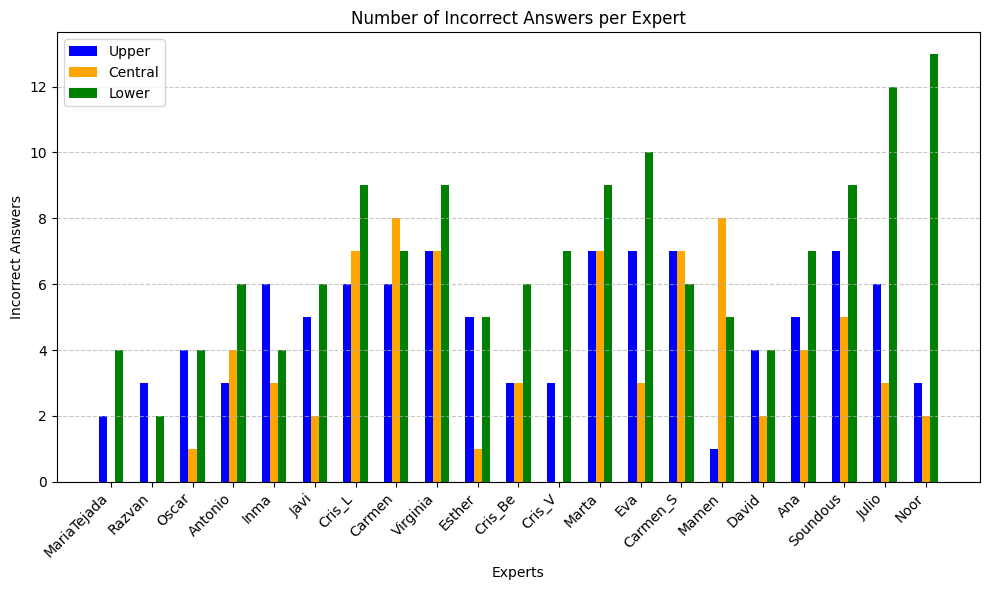

In [4]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_zero, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results["Sheet"]))

plt.bar(x - bar_width, df_results["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Incorrect Answers")
plt.title("Number of Incorrect Answers per Expert")
plt.xticks(ticks=x, labels=df_results["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

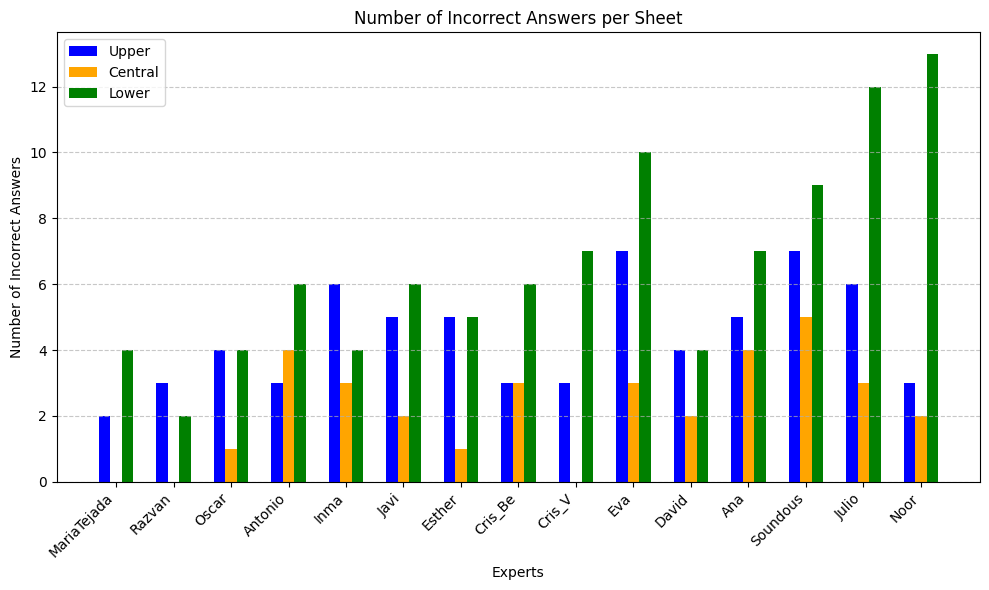

In [5]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_zero, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# 🔹 FILTER: Remove rows where "Central" is greater than 5
df_results_filter = df_results[df_results["Central"] <= 5]

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results_filter["Sheet"]))

plt.bar(x - bar_width, df_results_filter["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results_filter["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results_filter["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Number of Incorrect Answers")
plt.title("Number of Incorrect Answers per Sheet")
plt.xticks(ticks=x, labels=df_results_filter["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Analisis aciertos

In [6]:
# Load the Excel file
file_path = "confidence_comparative.xlsx"

# Read all sheets
xls = pd.ExcelFile(file_path)

# Store results
results_all = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    count_upper = df["Upper Jaccard"].ne(0).sum() if "Upper Jaccard" in df.columns else 0
    count_central = df["Central Jaccard"].ne(0).sum() if "Central Jaccard" in df.columns else 0
    count_lower = df["Lower Jaccard"].ne(0).sum() if "Lower Jaccard" in df.columns else 0
    total = count_upper + count_central + count_lower
    
    # print(f"{sheet_name}")
    # print(f"   Upper: {count_upper}  |  Central: {count_central}  |  Lower: {count_lower},     |     Total: {total}\n")
    # print(f"   ")
    
    results_all.append([sheet_name, count_upper, count_central, count_lower, total])

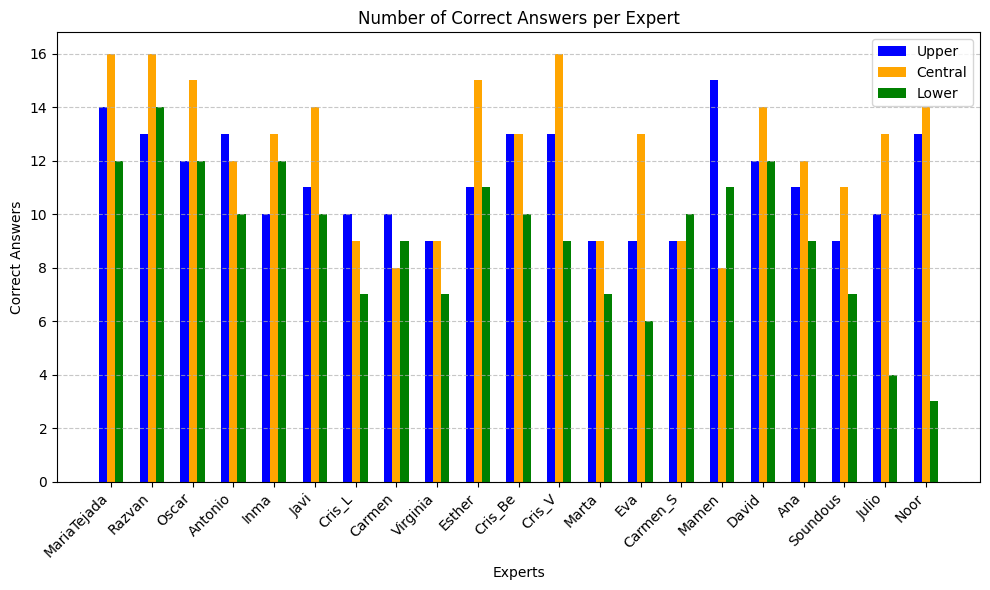

In [7]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_all, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results["Sheet"]))

plt.bar(x - bar_width, df_results["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Correct Answers")
plt.title("Number of Correct Answers per Expert")
plt.xticks(ticks=x, labels=df_results["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

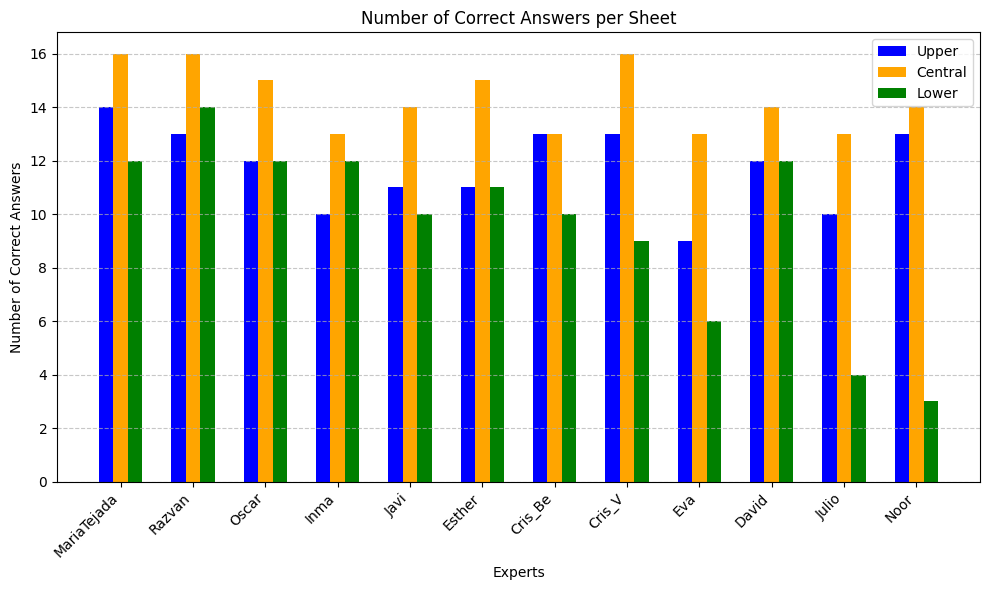

In [10]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_all, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# 🔹 FILTER: Remove rows where "Central" is greater than 10
df_results = df_results[df_results["Central"] > 12]

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results["Sheet"]))

plt.bar(x - bar_width, df_results["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Number of Correct Answers")
plt.title("Number of Correct Answers per Sheet")
plt.xticks(ticks=x, labels=df_results["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

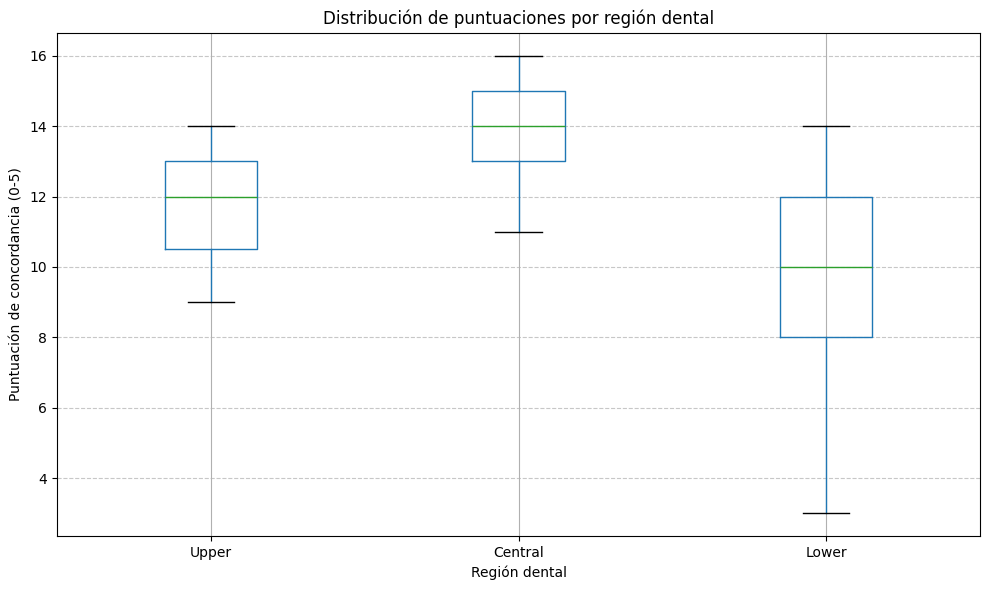

In [8]:
# ==========================================================================
# CÁLCULO DE MÉTRICAS ESTADÍSTICAS PARA EL ARTÍCULO CIENTÍFICO
# ==========================================================================

# 1. Calculamos estadísticas descriptivas por región
stats_by_region = df_results[["Upper", "Central", "Lower"]].describe().transpose()

# 2. Obtenemos las métricas específicas mencionadas en tu texto
central_mean = stats_by_region.loc["Central", "mean"].round(2)
central_std = stats_by_region.loc["Central", "std"].round(2)
upper_mean = stats_by_region.loc["Upper", "mean"].round(2)
upper_std = stats_by_region.loc["Upper", "std"].round(2)
lower_mean = stats_by_region.loc["Lower", "mean"].round(2)
lower_std = stats_by_region.loc["Lower", "std"].round(2)

# 3. Cálculo del promedio global (asumiendo que "Total" es la suma)
global_mean = df_results["Total"].mean() / 3  # Dividir entre 3 regiones
global_std = df_results["Total"].std() / 3

# 4. Porcentaje de casos con alta concordancia (≥4) en región central
high_agreement_central = (df_results["Central"] >= 4).mean() * 100

# 5. Diferencia de rendimiento entre regiones
performance_drop = central_mean - upper_mean  # Para comparación superior vs central

# ==========================================================================
# VISUALIZACIÓN COMPLEMENTARIA (BOXPLOT PARA MOSTRAR DISTRIBUCIONES)
# ==========================================================================
plt.figure(figsize=(10, 6))
df_results[["Upper", "Central", "Lower"]].boxplot()
plt.title("Distribución de puntuaciones por región dental")
plt.ylabel("Puntuación de concordancia (0-5)")
plt.xlabel("Región dental")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

In [9]:
print(f"""
RESULTADOS CLAVE:
1. Región Central: {central_mean} ± {central_std}
2. Región Superior: {upper_mean} ± {upper_std}
3. Región Inferior: {lower_mean} ± {lower_std}
4. Concordancia global: {global_mean:.2f} ± {global_std:.2f}
5. Casos con alta concordancia (≥4) en región central: {high_agreement_central:.1f}%
6. Diferencia Central-Superior: {performance_drop:.2f} puntos
""")


RESULTADOS CLAVE:
1. Región Central: 13.8 ± 1.57
2. Región Superior: 11.6 ± 1.59
3. Región Inferior: 9.4 ± 3.16
4. Concordancia global: 11.60 ± 1.70
5. Casos con alta concordancia (≥4) en región central: 100.0%
6. Diferencia Central-Superior: 2.20 puntos



## Resultados Elevados

In [10]:
# Load the Excel file
file_path = "confidence_comparative.xlsx"

# Read all sheets
xls = pd.ExcelFile(file_path)

# Store results
results_high = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    # Count the correct answers in each column (values 3, 4, or 5 in the column)
    # count_upper = df["Upper Jaccard"].apply(lambda x: any(score in str(x) for score in ["|3", "|4", "|5"])).sum() if "Upper Jaccard" in df.columns else 0
    # count_central = df["Central Jaccard"].apply(lambda x: any(score in str(x) for score in ["|3", "|4", "|5"])).sum() if "Central Jaccard" in df.columns else 0
    # count_lower = df["Lower Jaccard"].apply(lambda x: any(score in str(x) for score in ["|3", "|4", "|5"])).sum() if "Lower Jaccard" in df.columns else 0

    count_upper = df["Upper Jaccard"].apply(lambda x: any(score in str(x) for score in ["|4", "|5"])).sum() if "Upper Jaccard" in df.columns else 0
    count_central = df["Central Jaccard"].apply(lambda x: any(score in str(x) for score in ["|4", "|5"])).sum() if "Central Jaccard" in df.columns else 0
    count_lower = df["Lower Jaccard"].apply(lambda x: any(score in str(x) for score in ["|4", "|5"])).sum() if "Lower Jaccard" in df.columns else 0
    
    # Calculate the total correct answers
    total = count_upper + count_central + count_lower
    
    # print(f"{sheet_name}")
    # print(f"   Upper: {count_upper}  |  Central: {count_central}  |  Lower: {count_lower},     |     Total: {total}\n")
    # print(f"   ")
    
    results_high.append([sheet_name, count_upper, count_central, count_lower, total])


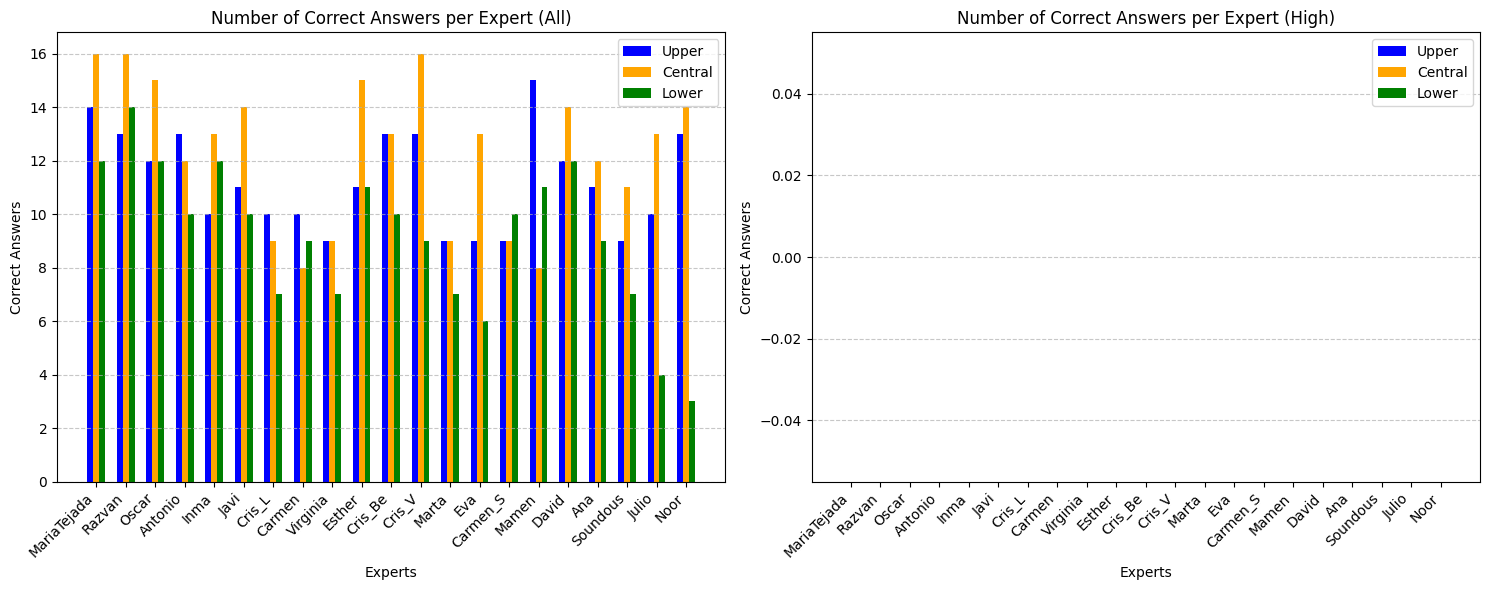

In [11]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot (for 'results_all')
df_results_all = pd.DataFrame(results_all, columns=["Sheet", "Upper", "Central", "Lower", "Total"])
bar_width = 0.2
x_all = np.arange(len(df_results_all["Sheet"]))

axes[0].bar(x_all - bar_width, df_results_all["Upper"], width=bar_width, label="Upper", color="blue")
axes[0].bar(x_all, df_results_all["Central"], width=bar_width, label="Central", color="orange")
axes[0].bar(x_all + bar_width, df_results_all["Lower"], width=bar_width, label="Lower", color="green")

axes[0].set_xlabel("Experts")
axes[0].set_ylabel("Correct Answers")
axes[0].set_title("Number of Correct Answers per Expert (All)")
axes[0].set_xticks(x_all)
axes[0].set_xticklabels(df_results_all["Sheet"], rotation=45, ha="right")
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Second plot (for 'results_high')
df_results_high = pd.DataFrame(results_high, columns=["Sheet", "Upper", "Central", "Lower", "Total"])
x_high = np.arange(len(df_results_high["Sheet"]))

axes[1].bar(x_high - bar_width, df_results_high["Upper"], width=bar_width, label="Upper", color="blue")
axes[1].bar(x_high, df_results_high["Central"], width=bar_width, label="Central", color="orange")
axes[1].bar(x_high + bar_width, df_results_high["Lower"], width=bar_width, label="Lower", color="green")

axes[1].set_xlabel("Experts")
axes[1].set_ylabel("Correct Answers")
axes[1].set_title("Number of Correct Answers per Expert (High)")
axes[1].set_xticks(x_high)
axes[1].set_xticklabels(df_results_high["Sheet"], rotation=45, ha="right")
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout so labels don't overlap
plt.tight_layout()

# Show the plots
plt.show()

La parte central es la de fijacion de los experto, fijamos eso y coincide.

Hemos desarrollado la experimentaxion en un entorno calibrado de 'Calibrate' y estos resultados (al chatgpt). La parte que importa es la central.
Y preguntar como plantear este tipo de experimentacion y como lo haria. 

### Diente que más confunde

In [12]:
# Store results
error_counts = {}

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    # Count the errors (0s) for each diente (Tooth) across all score columns
    for score_col in score_columns:
        # Get rows where the score is 0
        error_rows = df[df[score_col] == "0"]
        
        # Count errors per Tooth
        for tooth in error_rows["Tooth"]:
            if tooth not in error_counts:
                error_counts[tooth] = 0
            error_counts[tooth] += 1

# Get the top 5 teeth with the most errors
top_10_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the results
print("Top dientes con más errores:")
for tooth, count in top_10_teeth:
    print(f"Diente: {tooth}, Errores: {count}")

Top dientes con más errores:


In [13]:
# Store results
error_counts = {}

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Focus only on the "Central Jaccard" column
    if "Central Jaccard" in df.columns:
        # Get rows where the "Central Jaccard" is 0
        error_rows = df[df["Central Jaccard"] == "0"]
        
        # Count errors per Tooth
        for tooth in error_rows["Tooth"]:
            if tooth not in error_counts:
                error_counts[tooth] = 0
            error_counts[tooth] += 1

# Get the top 5 teeth with the most errors in the Central Jaccard
top_5_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:]

# Print the results
print("Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):")
for tooth, count in top_5_teeth:
    print(f"Diente: {tooth}, Errores: {count}")

Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):


### Sin outlier

In [14]:
error_counts = {}
for sheet_name in xls.sheet_names:
    if sheet_name not in df_results_filter["Sheet"].tolist():
        continue  
    
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    score_columns = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
    score_columns = [col for col in score_columns if col in df.columns]  
    
    for score_col in score_columns:
        error_rows = df[df[score_col] == "0"]
        
        for tooth in error_rows["Tooth"]:
            error_counts[tooth] = error_counts.get(tooth, 0) + 1

top_10_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top dientes con más errores:")
for tooth, count in top_10_teeth:
    print(f"Diente: {tooth}, Errores: {count}")


Top dientes con más errores:


In [15]:
error_counts = {}
for sheet_name in xls.sheet_names:
    if sheet_name not in df_results_filter["Sheet"].tolist():
        continue  
    
    df = pd.read_excel(xls, sheet_name=sheet_name)
    if "Central Jaccard" in df.columns:
        error_rows = df[df["Central Jaccard"] == "0"]
        
        for tooth in error_rows["Tooth"]:
            if tooth not in error_counts:
                error_counts[tooth] = 0
            error_counts[tooth] += 1

top_5_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:]

print("Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):")
for tooth, count in top_5_teeth:
    print(f"Diente: {tooth}, Errores: {count}")

Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):


In [11]:
import pandas as pd

# Cargar archivo
file_path = "confidence_comparative_best.xlsx"
xls = pd.ExcelFile(file_path)

results_all = []
dfs = []

# Función para clasificar Jaccard en rangos de calidad
def classify_jaccard(jaccard):
    if jaccard >= 0.6:
        return "Coincidencia superior a 0.7"
    # elif jaccard >= 0.6:
    #     return "Bueno"
    # elif jaccard >= 0.4:
    #     return "Aceptable"
    # elif jaccard >= 0.2:
    #     return "Bajo"
    else:
        return "No superior"

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    dfs.append(df)
    
    # Reemplazar ceros por NaN para ignorarlos
    df_no_zeros = df.replace(0, pd.NA)
    
    jaccard_cols = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
    jaccard_cols = [col for col in jaccard_cols if col in df_no_zeros.columns]

    means = df_no_zeros[jaccard_cols].mean(skipna=True)
    stds = df_no_zeros[jaccard_cols].std(skipna=True)
    global_mean = means.mean()
    global_std = means.std()

    # Distribución de calidad para el "Central Jaccard"
    quality_distribution = df_no_zeros["Central Jaccard"].dropna().apply(classify_jaccard).value_counts(normalize=True) * 100

    # Porcentaje de ceros en el caso global
    zero_percentage = (df_no_zeros[jaccard_cols].isna().sum() / len(df)) * 100
    
    results_all.append([sheet_name, *[f"{means[col]:.3f} ± {stds[col]:.2f}" for col in jaccard_cols], 
                        f"{global_mean:.3f} ± {global_std:.2f}", 
                        f"Central Quality Distribution: {quality_distribution.to_dict()}", 
                        f"Zero Percentage: {zero_percentage.to_dict()}"])

# Concatenar todo para resumen global
df_total = pd.concat(dfs, ignore_index=True).replace(0, pd.NA)

jaccard_cols_total = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
jaccard_cols_total = [col for col in jaccard_cols_total if col in df_total.columns]

means_total = df_total[jaccard_cols_total].mean(skipna=True)
stds_total = df_total[jaccard_cols_total].std(skipna=True)
global_mean_total = means_total.mean()
global_std_total = means_total.std()

# Distribución de calidad en la región Central
quality_distribution_total = df_total["Central Jaccard"].dropna().apply(classify_jaccard).value_counts(normalize=True) * 100

# Porcentaje de ceros en el caso global
zero_percentage_total = (df_total[jaccard_cols_total].isna().sum() / len(df_total)) * 100

print("Resumen general (todas las hojas unidas, ignorando no coincidencias osea 0):")
for region in jaccard_cols_total:
    print(f"   {region.split()[0]}: {means_total[region]:.3f} ± {stds_total[region]:.2f}")
# print(f"   Global: {global_mean_total:.3f} ± {global_std_total:.2f}")

print("\n")
# print(f"   Central Quality Distribution: {quality_distribution_total.to_dict()}")
print(f"   Zero Percentage: {zero_percentage_total.to_dict()}")



Resumen general (todas las hojas unidas, ignorando no coincidencias osea 0):
   Upper: 0.584 ± 0.21
   Central: 0.764 ± 0.20
   Lower: 0.574 ± 0.24


   Zero Percentage: {'Upper Jaccard': 26.5625, 'Central Jaccard': 10.416666666666668, 'Lower Jaccard': 40.10416666666667}


C:\Users\rafav\AppData\Local\Temp\ipykernel_11004\1891804668.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_jaccard, x="Region", y="Jaccard", palette="Set2")


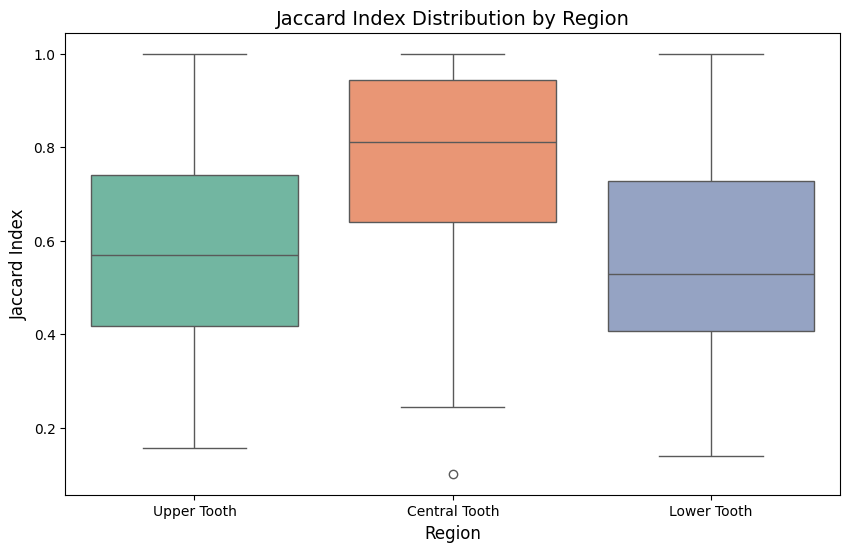

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "confidence_comparative_best.xlsx"
xls = pd.ExcelFile(file_path)

dfs = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    dfs.append(df)

# Concatenate all sheets for global summary
df_total = pd.concat(dfs, ignore_index=True).replace(0, pd.NA)

# Jaccard columns
jaccard_cols_total = ["Upper Jaccard", "Central Jaccard", "Lower Jaccard"]
jaccard_cols_total = [col for col in jaccard_cols_total if col in df_total.columns]

# Create a DataFrame for Jaccard columns
df_jaccard = df_total[jaccard_cols_total].melt(var_name="Region", value_name="Jaccard")

# Replace region names with the desired labels
df_jaccard["Region"] = df_jaccard["Region"].replace({
    "Upper Jaccard": "Upper Tooth",
    "Central Jaccard": "Central Tooth",
    "Lower Jaccard": "Lower Tooth"
})

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_jaccard, x="Region", y="Jaccard", palette="Set2")

# Add title and labels
plt.title("Jaccard Index Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Jaccard Index", fontsize=12)

# Display the plot
plt.show()
